In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv("vid18_180219.dat",delimiter=',')
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
df = df0.filter(['TIMESTAMP','AirTC_Avg'],axis=1)
df.head()

,TIMESTAMP,AirTC_Avg
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [4]:
df.dtypes

TIMESTAMP     object
AirTC_Avg    float64
dtype: object

In [5]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)
df = df.drop(['TIMESTAMP'], 1)
df.head()

,AirTC_Avg,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [6]:
df.dtypes

AirTC_Avg           float64
FECHA        datetime64[ns]
dtype: object

In [7]:
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
df['DIA'] = df['FECHA'].dt.day
df['HORA'] = df['FECHA'].dt.hour
df.head()

,AirTC_Avg,FECHA,AÑO,MES,DIA,HORA
0,23.50,2018-05-11 20:10:00,2018,5,11,20
1,22.96,2018-05-11 20:20:00,2018,5,11,20
2,22.73,2018-05-11 20:30:00,2018,5,11,20
3,22.40,2018-05-11 20:40:00,2018,5,11,20
4,22.46,2018-05-11 20:50:00,2018,5,11,20


In [8]:
df = df[(df['FECHA'] >= "2018-11-1")]
df= df.reset_index(drop=True)
df.head()

,AirTC_Avg,FECHA,AÑO,MES,DIA,HORA
0,9.13,2018-11-01 00:00:00,2018,11,1,0
1,8.89,2018-11-01 00:10:00,2018,11,1,0
2,8.66,2018-11-01 00:20:00,2018,11,1,0
3,8.52,2018-11-01 00:30:00,2018,11,1,0
4,8.47,2018-11-01 00:40:00,2018,11,1,0


In [9]:
df["TEMPROM"] = np.round(df.groupby(["AÑO","MES","DIA","HORA"])["AirTC_Avg"].transform("mean"),decimals=1)
df["TMAX"] = np.round(df.groupby(["AÑO","MES","DIA"])["AirTC_Avg"].transform("max"),decimals=1)
df["TMIN"] = np.round(df.groupby(["AÑO","MES","DIA"])["AirTC_Avg"].transform("min"),decimals=1)
df = df.drop(["AirTC_Avg",'FECHA'], 1)
df.head(25)

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN
0,2018,11,1,0,8.7,29.6,6.1
1,2018,11,1,0,8.7,29.6,6.1
2,2018,11,1,0,8.7,29.6,6.1
3,2018,11,1,0,8.7,29.6,6.1
4,2018,11,1,0,8.7,29.6,6.1
5,2018,11,1,0,8.7,29.6,6.1
6,2018,11,1,1,8.5,29.6,6.1
7,2018,11,1,1,8.5,29.6,6.1
8,2018,11,1,1,8.5,29.6,6.1
9,2018,11,1,1,8.5,29.6,6.1


In [10]:
df = df.drop_duplicates(subset=['AÑO','MES','DIA','HORA'])
df=df.reset_index(drop=True)
df.head(10)

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN
0,2018,11,1,0,8.7,29.6,6.1
1,2018,11,1,1,8.5,29.6,6.1
2,2018,11,1,2,8.7,29.6,6.1
3,2018,11,1,3,8.8,29.6,6.1
4,2018,11,1,4,7.4,29.6,6.1
5,2018,11,1,5,7.3,29.6,6.1
6,2018,11,1,6,6.8,29.6,6.1
7,2018,11,1,7,8.1,29.6,6.1
8,2018,11,1,8,15.0,29.6,6.1
9,2018,11,1,9,19.7,29.6,6.1


In [11]:
#Cálculo de HF de acuerdo al modelo de INIFAP-CECH
#Hacemos varios arreglos para calcular las unidades de frío de acuerdo a los 
#parámetros de la tabla.

#HFhr= Horas frio (solo contiene 1 o 0 para indicar si es hora frío o no)
#HChr = Horas con temperatura >=25°C

HFhr=[]
for i in range(0,len(df)):
    if(0<df['TEMPROM'][i]<=10):
        HFhr.append(1)
    else:
        HFhr.append(0)

HChr=[]
for i in range(0,len(df)):
    if(df['TEMPROM'][i]>=25):
        HChr.append(1)
    else:
        HChr.append(0)
        
#Cálculo de UF de acuerdo al modelo de Utah
UF = []
for i in range(0,len(df)):
    if(df['TEMPROM'][i]<=1.4):
        UF.append(0.0)
    elif(1.5<=df['TEMPROM'][i]<=2.4):
        UF.append(0.5)
    elif(2.5<=df['TEMPROM'][i]<=9.1):
        UF.append(1.0)
    elif(9.2<=df['TEMPROM'][i]<=12.4):
        UF.append(0.5)
    elif(12.5<=df['TEMPROM'][i]<=15.9):
        UF.append(0.0)
    elif(12.5<=df['TEMPROM'][i]<=15.9):
        UF.append(0.0)
    elif(16.0<=df['TEMPROM'][i]<=18.0):
        UF.append(-0.5)
    elif(18.0<=df['TEMPROM'][i]):
        UF.append(-1.0)

In [12]:
df['UF']=UF
df['HFhr']=HFhr
df['HChr']=HChr
df.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF,HFhr,HChr
0,2018,11,1,0,8.7,29.6,6.1,1.0,1,0
1,2018,11,1,1,8.5,29.6,6.1,1.0,1,0
2,2018,11,1,2,8.7,29.6,6.1,1.0,1,0
3,2018,11,1,3,8.8,29.6,6.1,1.0,1,0
4,2018,11,1,4,7.4,29.6,6.1,1.0,1,0


In [13]:
df["UF24"] = df.groupby(["AÑO","MES","DIA"])["UF"].transform("sum")
df["HF"] = df.groupby(["AÑO","MES","DIA"])["HFhr"].transform("sum")
df["HC"] = df.groupby(["AÑO","MES","DIA"])["HChr"].transform("sum")
df = df.drop(["HFhr",'HChr','UF'], 1)
df.head(25)

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF24,HF,HC
0,2018,11,1,0,8.7,29.6,6.1,-0.5,8,6
1,2018,11,1,1,8.5,29.6,6.1,-0.5,8,6
2,2018,11,1,2,8.7,29.6,6.1,-0.5,8,6
3,2018,11,1,3,8.8,29.6,6.1,-0.5,8,6
4,2018,11,1,4,7.4,29.6,6.1,-0.5,8,6
5,2018,11,1,5,7.3,29.6,6.1,-0.5,8,6
6,2018,11,1,6,6.8,29.6,6.1,-0.5,8,6
7,2018,11,1,7,8.1,29.6,6.1,-0.5,8,6
8,2018,11,1,8,15.0,29.6,6.1,-0.5,8,6
9,2018,11,1,9,19.7,29.6,6.1,-0.5,8,6


In [14]:
df = df.drop_duplicates(subset=['AÑO','MES','DIA'])
df=df.reset_index(drop=True)
df.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF24,HF,HC
0,2018,11,1,0,8.7,29.6,6.1,-0.5,8,6
1,2018,11,2,0,10.6,31.4,10.0,-9.0,0,8
2,2018,11,3,0,12.5,30.5,10.2,-9.5,0,8
3,2018,11,4,0,12.7,31.4,11.2,-11.5,0,8
4,2018,11,5,0,13.9,31.2,11.1,-8.0,0,8


In [15]:
#Creamos una columna para HFE u UF24CUM
#HFE = El número de horas frío efectivas por día ( HFE= HF - número de horas con T >= 25ºC)
df['HFE']=df.HF-df.HC
df.head()

,AÑO,MES,DIA,HORA,TEMPROM,TMAX,TMIN,UF24,HF,HC,HFE
0,2018,11,1,0,8.7,29.6,6.1,-0.5,8,6,2
1,2018,11,2,0,10.6,31.4,10.0,-9.0,0,8,-8
2,2018,11,3,0,12.5,30.5,10.2,-9.5,0,8,-8
3,2018,11,4,0,12.7,31.4,11.2,-11.5,0,8,-8
4,2018,11,5,0,13.9,31.2,11.1,-8.0,0,8,-8


In [16]:
HFE = [df['HFE'][i] for i in range(0,len(df))]
UF24 = [df['UF24'][i] for i in range(0,len(df))]

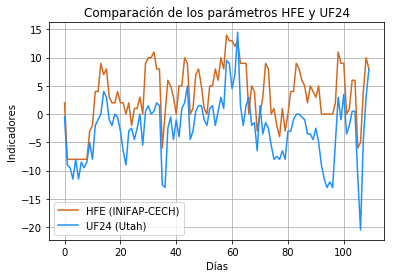

In [22]:
Y1 = HFE
Y2 = UF24

plt.plot(Y1, label = "HFE (INIFAP-CECH)", color = '#D2691E')   
plt.plot(Y2, label = "UF24 (Utah)", color = '#1E90FF')   
plt.xlabel("Días")   
plt.ylabel("Indicadores")  
plt.legend()
plt.grid()
plt.title('Comparación de los parámetros HFE y UF24')
plt.savefig('Comparativo',plt=2000)
plt.show()

In [18]:
HFEcum = df['HFE'].cumsum()
UF24cum = df['UF24'].cumsum()

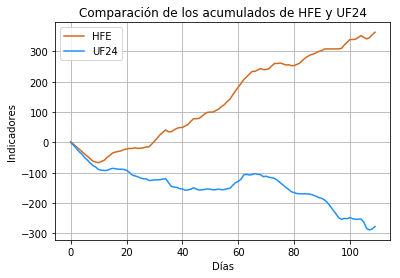

In [24]:
Y1 = HFEcum
Y2 = UF24cum

plt.plot(Y1, label = "HFE", color = '#D2691E')   
plt.plot(Y2, label = "UF24", color = '#1E90FF')   
plt.xlabel("Días")   
plt.ylabel("Indicadores")  
plt.legend()
plt.grid()
plt.title('Comparación de los acumulados de HFE y UF24')
plt.savefig('Acumulativo',plt=2000)
plt.show()